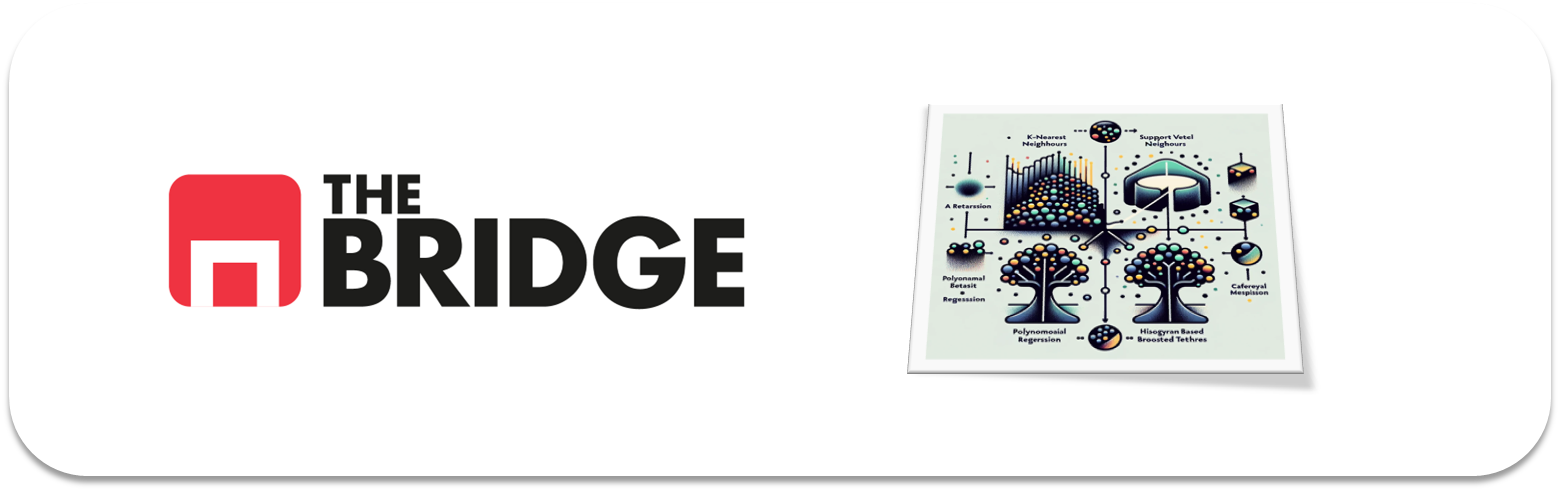

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [233]:
import pandas as pd
import numpy as np

# pintar
import matplotlib.pyplot as plt
import seaborn as sns

#estadística
from scipy.stats import f_oneway, chi2_contingency, mannwhitneyu, kruskal

#preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

# modelado
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, classification_report

In [234]:
# Importar el dataset
data = pd.read_csv('./data/wines_dataset.csv',sep='|')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [236]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [237]:
def tipifica_variables(df, umbral_categoria=10, umbral_continua=30):
    """
    La función hace una tipificación de las variables de un dataset, obteniendo datos relevantes para el posterior análisis.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos a analizar.
    umbral_categoria (int): Valor de cardinalidad a partir del cual se considera una variable categórica.
    umbral_continua (int): Porcentaje de cardinalidad a partir del cual se considera una variable continua.

    Retorna:
    pd.DataFrame: DataFrame con los nombres de las variables, el tipo de variable sugerido en función de la cardinalidad
                  y el porcentaje de variación de la misma, además del dtype original de cada variable.
    """
    # Preparar el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_tip = pd.DataFrame({
        'nombre_variable': df.columns,
        'Card': df.nunique(),
        '%_Card': df.nunique() / len(df) * 100,
        'dtype': df.dtypes.astype(str)
    })

    # Corrección para cuando solo tengo un valor
    df_tip.loc[df_tip['Card'] == 1, '%_Card'] = 0.00

    # Crear la columna de sugerencia de tipo de variable
    df_tip['tipo_sugerido'] = 'Categorica'
    df_tip.loc[df_tip['Card'] == 2, 'tipo_sugerido'] = 'Binaria'
    df_tip.loc[df_tip['Card'] >= umbral_categoria, 'tipo_sugerido'] = 'Numerica discreta'
    df_tip.loc[df_tip['%_Card'] >= umbral_continua, 'tipo_sugerido'] = 'Numerica continua'

    # Eliminar las columnas auxiliares que no me interesan
    # df_tip = df_tip.reset_index().drop(['Card', '%_Card','COL_N'] axis=1)

    return df_tip

##### Split train-test

In [238]:
# Split train-test
from sklearn.model_selection import train_test_split

# División del dataset en 80% para entrenamietno y 20% de prueva
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Tamaños de los subconjuntos
print(f"✅ Tamaño de train_data: {train.shape}")
print(f"✅ Tamaño de test_data: {test.shape}")

✅ Tamaño de train_data: (5197, 13)
✅ Tamaño de test_data: (1300, 13)


In [239]:
tipifica_variables(train)

,nombre_variable,Card,%_Card,dtype,tipo_sugerido
fixed acidity,fixed acidity,100,1.924187,float64,Numerica discreta
volatile acidity,volatile acidity,177,3.405811,float64,Numerica discreta
citric acid,citric acid,87,1.674043,float64,Numerica discreta
residual sugar,residual sugar,308,5.926496,float64,Numerica discreta
chlorides,chlorides,194,3.732923,float64,Numerica discreta
free sulfur dioxide,free sulfur dioxide,132,2.539927,float64,Numerica discreta
total sulfur dioxide,total sulfur dioxide,274,5.272272,float64,Numerica discreta
density,density,951,18.299019,float64,Numerica discreta
pH,pH,106,2.039638,float64,Numerica discreta
sulphates,sulphates,106,2.039638,float64,Numerica discreta


In [240]:
target_clas = data['quality']
target_clas.value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

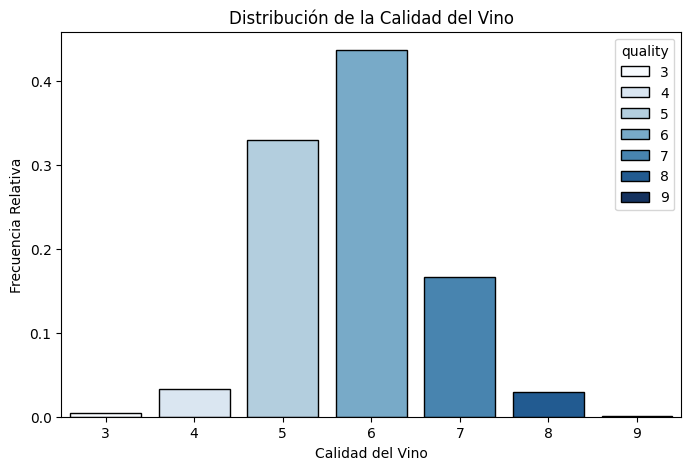

In [241]:
#pintar la distribución de frecuencias relativas
frequencies = target_clas.value_counts(normalize=True).sort_index()

# Graficar las frecuencias relativas
plt.figure(figsize=(8, 5))
sns.barplot(x=frequencies.index, y=frequencies.values, hue=frequencies.index, palette='Blues', edgecolor='black')
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia Relativa")
plt.title("Distribución de la Calidad del Vino")
plt.show()


In [242]:
target_reg = data['alcohol']

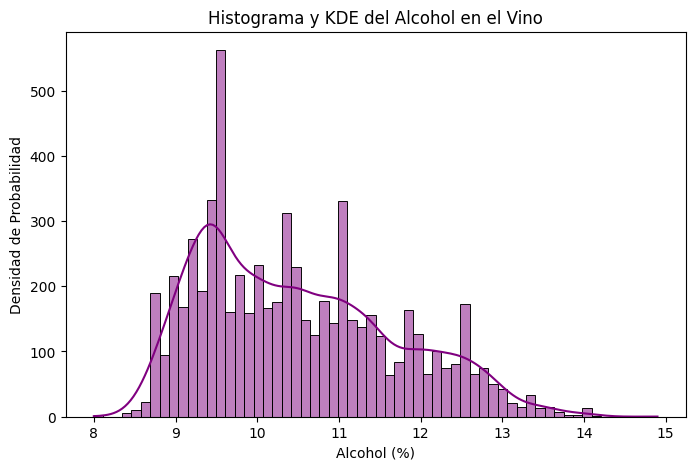

In [243]:
# Graficar histograma con función de densidad de probabilidad para target_reg
target_reg = data['alcohol']
plt.figure(figsize=(8, 5))
sns.histplot(target_reg, kde=True, bins=60, color='purple', edgecolor='black')
plt.xlabel("Alcohol (%)")
plt.ylabel("Densidad de Probabilidad")
plt.title("Histograma y KDE del Alcohol en el Vino")
plt.show()

##### Mini EDA de las features - Clasificación

In [244]:
features_num = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
features_cat = ['class']

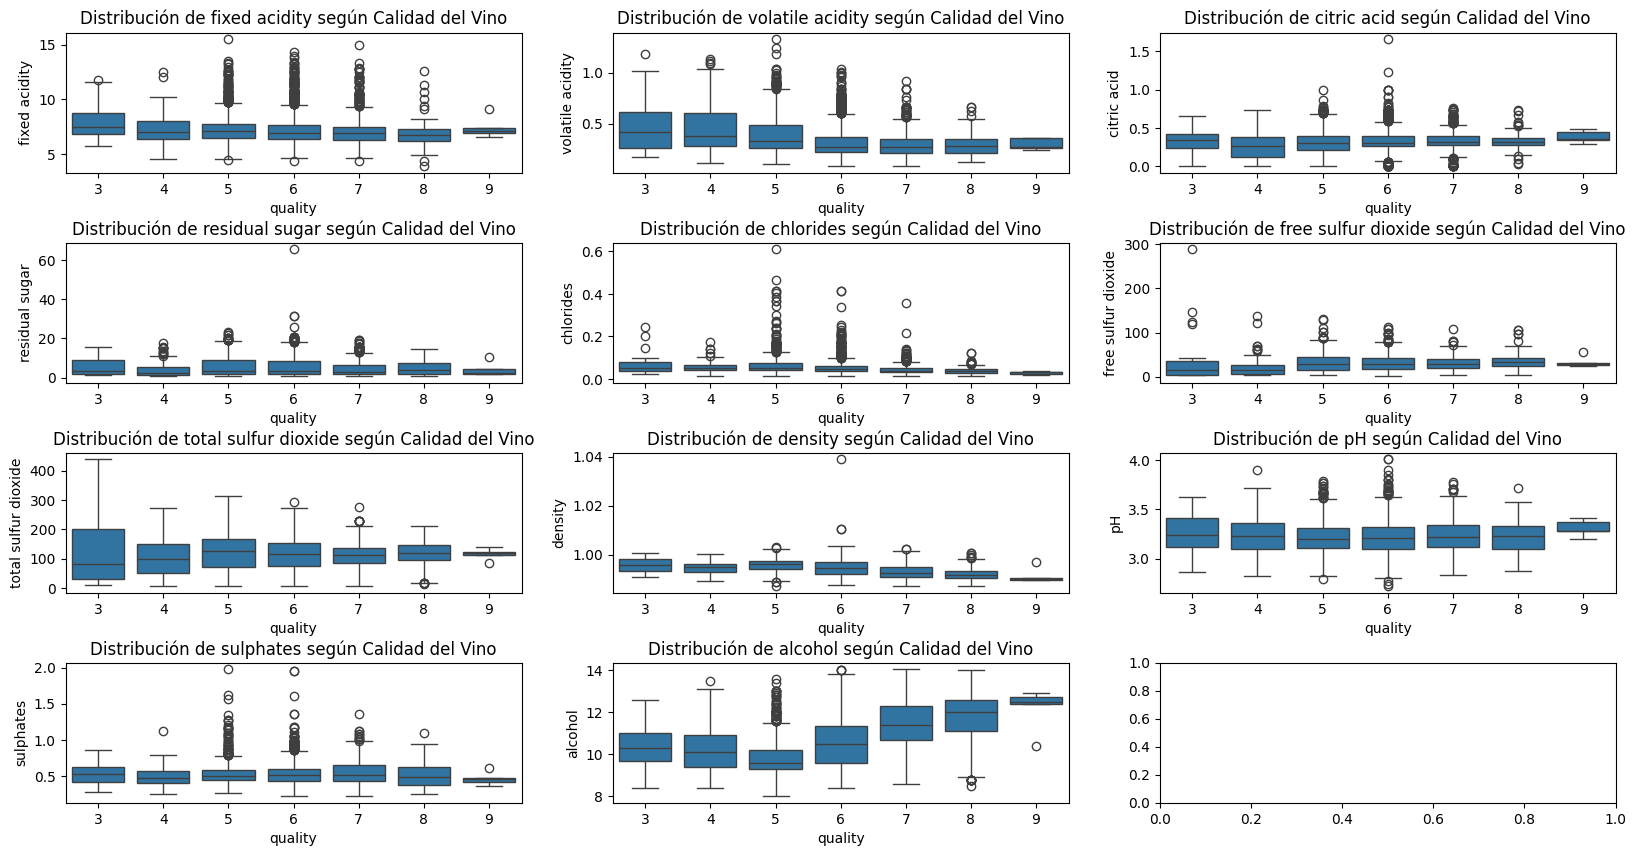

Resultados de ANOVA:
                             p_value
alcohol               3.833028e-302
density               1.179501e-132
volatile acidity       1.749630e-85
chlorides              1.001147e-49
free sulfur dioxide    4.308168e-15
citric acid            2.121525e-10
total sulfur dioxide   1.597616e-09
residual sugar         1.991254e-09
fixed acidity          1.573770e-06
sulphates              2.009732e-05
pH                     6.441383e-02
Variables con diferencia significativa: ['alcohol', 'density', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'citric acid', 'total sulfur dioxide', 'residual sugar', 'fixed acidity', 'sulphates']


In [245]:
# Boxplots para ver la distribución de cada feature respecto a la calidad
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
for ax, feature in zip(axes.flat, features_num):
    sns.boxplot(x=train['quality'], y=train[feature], ax=ax)
    ax.set_title(f"Distribución de {feature} según Calidad del Vino")
plt.show()


# Prueba ANOVA para identificar diferencias significativas entre clases
anova_results = {}
for feature in features_num:
    groups = [train[train['quality'] == cls][feature] for cls in train['quality'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Convertir a DataFrame y mostrar resultados
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value']).sort_values(by='p_value')
print("Resultados de ANOVA:\n", anova_df)

# Crear lista de variables con diferencia significativa (p < 0.05)
significant_features = anova_df[anova_df['p_value'] < 0.05].index.tolist()
print("Variables con diferencia significativa:", significant_features)



Chi2 Test para class:
Chi2: 81.2790, p-valor: 0.0000
La variable 'class' tiene una relación significativa con la calidad del vino.


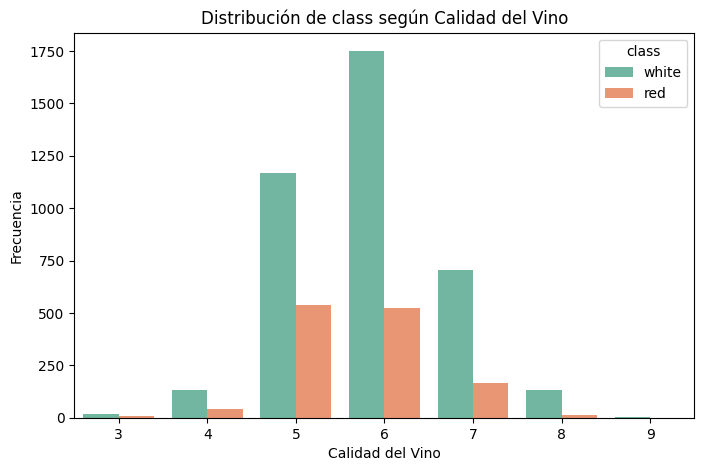

In [246]:
# Prueba de Chi-cuadrado para la relación entre 'class' y 'quality'
contingency_table = pd.crosstab(train['class'], train['quality'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2 Test para class:")
print(f"Chi2: {chi2:.4f}, p-valor: {p:.4f}")
if p < 0.05:
    print("La variable 'class' tiene una relación significativa con la calidad del vino.")
else:
    print("La variable 'class' no tiene una relación significativa con la calidad del vino.")

# Visualización de la distribución de 'class' respecto a 'quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', hue='class', data=train, palette='Set2')
plt.title("Distribución de class según Calidad del Vino")
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia")
plt.legend(title='class')
plt.show()


##### X_train, X_test, y_train, y_test para clasificación

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'volatile acidity'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'fixed acidity'}>],
       [<Axes: title={'center': 'sulphates'}>, <Axes: >, <Axes: >]],
      dtype=object)

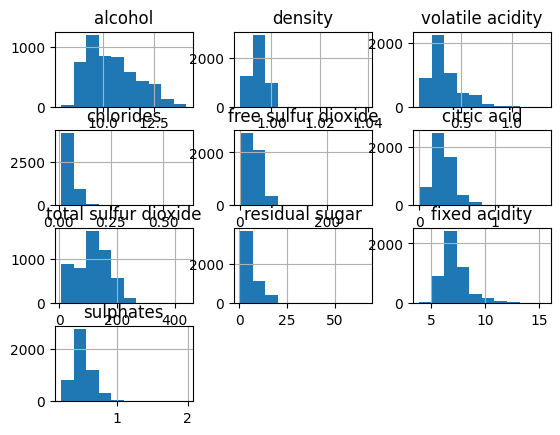

In [247]:
# Crear X_train, X_test, y_train, y_test para clasificación con variables numéricas
X_train_clas = train[significant_features].copy()
X_test_clas = test[significant_features].copy()

y_train_clas = train['quality']
y_test_clas = test['quality']

# Asegurar que y_train e y_test sean enteros
y_train = y_train_clas.astype(int)
y_test = y_test_clas.astype(int)

X_train_clas.hist()

In [248]:
# Transformación logarítmica de todas las variables de X_train y X_test
X_train_clas = X_train_clas.apply(np.log1p)
X_test_clas = X_test_clas.apply(np.log1p)

# Escalado de las variables con StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_clas = pd.DataFrame(scaler.fit_transform(X_train_clas), columns=X_train_clas.columns, index=X_train_clas.index)
X_test_clas = pd.DataFrame(scaler.transform(X_test_clas), columns=X_test_clas.columns, index=X_test_clas.index)

print("Escalado aplicado a las variables de X_train y X_test")

Escalado aplicado a las variables de X_train y X_test


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'volatile acidity'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'fixed acidity'}>],
       [<Axes: title={'center': 'sulphates'}>, <Axes: >, <Axes: >]],
      dtype=object)

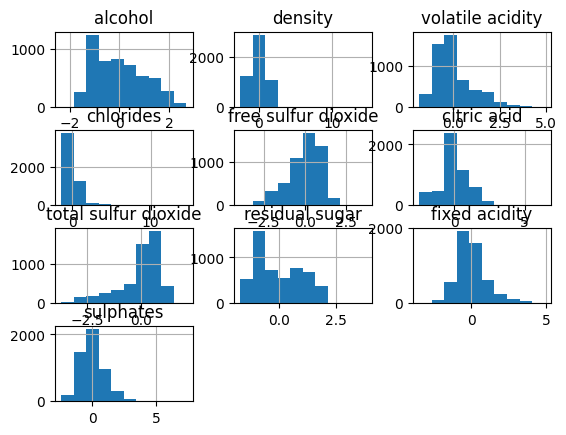

In [249]:
X_train_clas.hist()

In [250]:
# Transformar variable categórica con One Hot Encoder
X_train_clas_2 = train['class'].copy()
X_test_clas_2 = test['class'].copy()

# Aplicar One-Hot Encoding a la variable categórica 'class' con pd.get_dummies
X_train_clas_2 = pd.get_dummies(train[['class']], dtype = int)
X_test_clas_2 = pd.get_dummies(test[['class']], dtype = int)

print("One-Hot Encoding aplicado a la variable categórica 'class' usando pd.get_dummies")

One-Hot Encoding aplicado a la variable categórica 'class' usando pd.get_dummies


In [251]:
X_test_clas_2

,class_red,class_white
3103,0,1
1419,0,1
4761,0,1
4690,0,1
4032,0,1
...,...,...
889,0,1
2850,1,0
4917,1,0
5198,1,0


In [252]:
# crear X_train y X_test con todas las variables
X_train_clas = pd.concat([X_train_clas.copy(), X_train_clas_2], axis=1)
X_test_clas = pd.concat([X_test_clas.copy(), X_test_clas_2], axis=1)

print("X_train y X_test finales creados correctamente")

X_train y X_test finales creados correctamente


In [253]:
X_test_clas

,alcohol,density,volatile acidity,chlorides,free sulfur dioxide,citric acid,total sulfur dioxide,residual sugar,fixed acidity,sulphates,class_red,class_white
3103,-1.022479,-0.452504,-0.069834,-0.205494,0.603446,-0.289263,0.830695,-1.096875,0.230734,-0.032403,0,1
1419,1.487767,-1.463689,0.062324,-0.702119,0.205301,-0.505652,0.043129,-0.242603,-0.458083,-0.933655,0,1
4761,1.634340,-1.167492,-0.069834,-0.835769,0.439229,0.263694,0.071287,0.195769,-0.641625,0.529723,0,1
4690,1.634340,-1.433731,-0.690442,-0.969939,0.786503,0.060273,0.600571,-0.979618,-0.279309,0.110855,0,1
4032,1.413652,-1.799984,0.062324,-0.568984,1.231666,-0.360820,0.511364,-0.819648,-0.368116,-0.398961,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889,-1.118286,1.091231,-0.306002,0.251656,0.349937,0.060273,1.042859,1.645196,0.392680,-0.549087,0,1
2850,-0.466469,1.210596,0.876056,2.874151,0.523558,0.847887,-0.886684,-0.979618,3.021316,2.179860,1,0
4917,1.338973,-0.043811,0.062324,-0.107022,-2.237064,1.095898,-3.230899,-0.721949,2.210684,1.129456,1,0
5198,0.799688,-0.153436,0.816068,0.574520,-1.800499,-1.031634,-2.971658,-0.979618,-0.830197,0.110855,1,0


##### Mini EDA de las features - Regresión

In [254]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [255]:
features_num_reg = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']
features_cat_reg = ['quality','class']

Correlaciones finales con la variable objetivo:
alcohol                 1.000000
density                 0.682345
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
Name: alcohol, dtype: float64


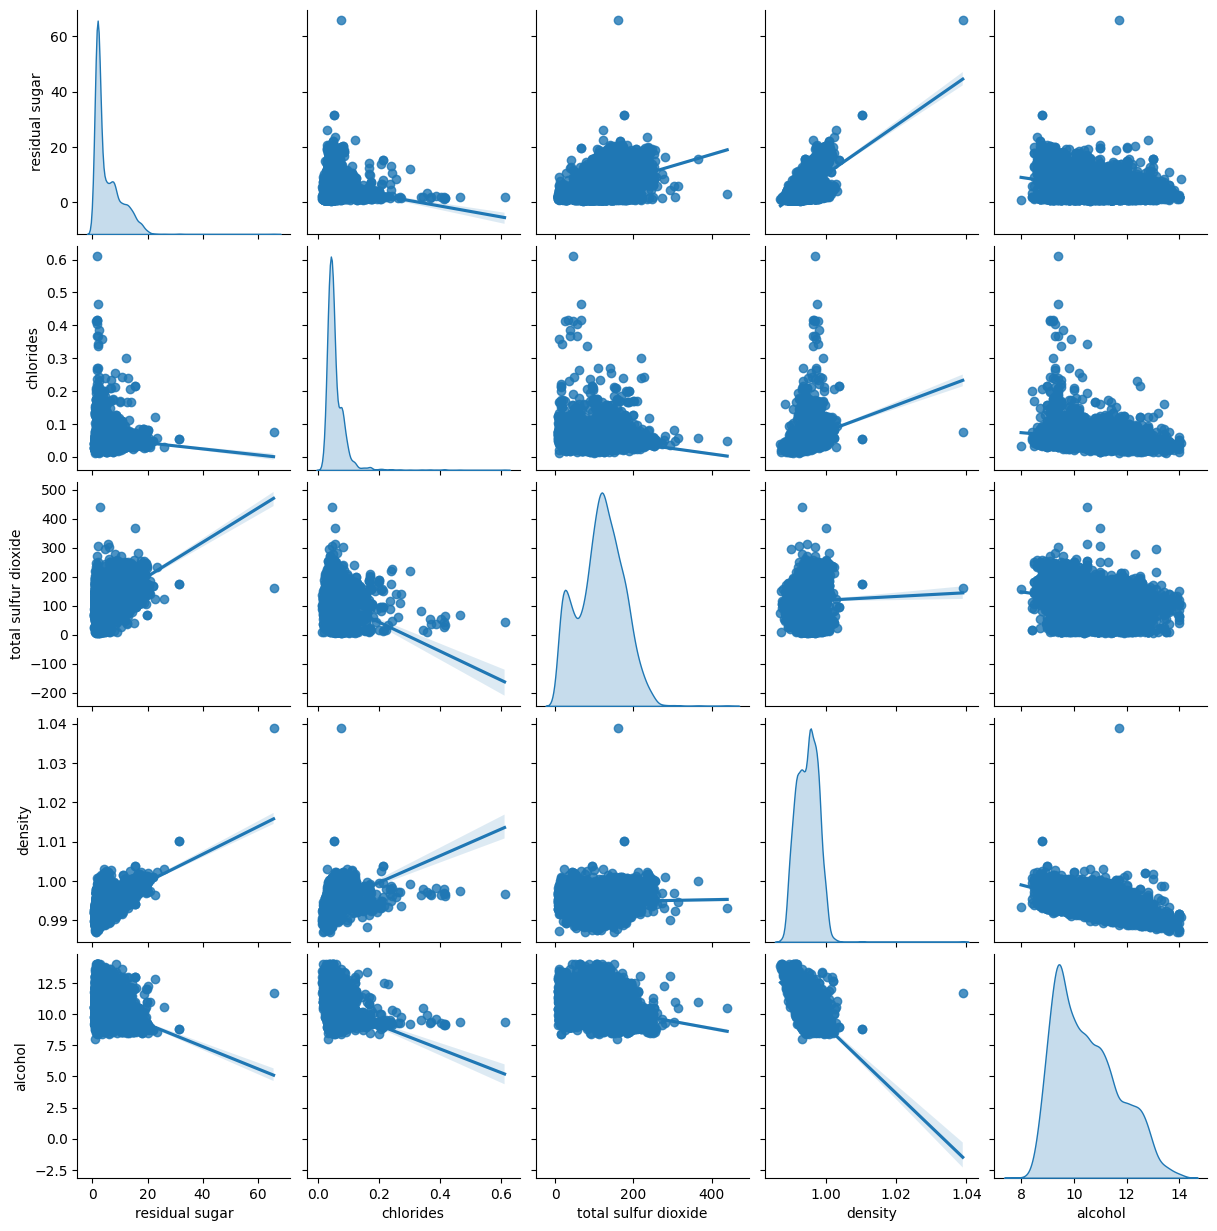

Variables seleccionadas: ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density']


In [256]:
# Análisis de correlación de target_reg con las features numéricas
features_num_reg = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']

target_reg = data['alcohol']
train[features_num_reg]

# Agregar la variable objetivo a la lista seleccionada
features_num_reg.append('alcohol')

correlations = train[features_num_reg].corr()['alcohol'].abs()
correlations

# Seleccionar variables con correlación > 0.3 con la variable objetivo
high_corr_features = correlations[correlations > 0.25].index.tolist()
high_corr_features

# Eliminar la variable objetivo de la lista (ya que aparece con correlación 1.0 consigo misma)
high_corr_features.remove('alcohol')
high_corr_features

# Filtrar variables altamente correlacionadas entre sí 
corr_matrix = train[high_corr_features].corr().abs()
selected_features_reg = high_corr_features.copy()

for feature in high_corr_features:
    for other_feature in high_corr_features:
        if feature != other_feature and other_feature in selected_features_reg:
            if corr_matrix.loc[feature, other_feature] > 0.75:
                selected_features_reg.remove(other_feature)

# Agregar la variable objetivo a la lista seleccionada
selected_features_reg.append('alcohol')

# Calcular correlaciones finales con la variable objetivo
final_correlations = train[selected_features_reg].corr()['alcohol']
print("Correlaciones finales con la variable objetivo:")
print(final_correlations.abs().sort_values(ascending=False))

# 3. Visualizar con pairplot
sns.pairplot(train[selected_features_reg], kind='reg', diag_kind='kde')
plt.show()

selected_features_reg.remove('alcohol')

# Imprimir las características seleccionadas
print("Variables seleccionadas:", selected_features_reg)


In [257]:
# Análsis Krustal y U_ManWhitney entre la variable target_reg y las variables categóricas

features_cat_reg = ['quality','class']

# Función para realizar el test de significancia adecuado
def perform_significance_test(df, cat_var, num_var):
    unique_classes = df[cat_var].nunique()
    if unique_classes == 2:
        stat, p = mannwhitneyu(df[df[cat_var] == df[cat_var].unique()[0]][num_var],
                               df[df[cat_var] == df[cat_var].unique()[1]][num_var])
        print(f"Mann-Whitney U Test para {num_var} por {cat_var}: p-valor = {p:.4f}")
    else:
        groups = [df[df[cat_var] == cls][num_var] for cls in df[cat_var].unique()]
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis Test para {num_var} por {cat_var}: p-valor = {p:.4f}")
    return cat_var if p < 0.05 else None

# Evaluar significancia de class y quality respecto a target_reg
significant_categorical_features_reg = []
for cat in features_cat_reg:
    result = perform_significance_test(train, cat, 'alcohol')
    if result:
        significant_categorical_features_reg.append(result)

print("Variables categóricas con diferencia significativa (p < 0.05):", significant_categorical_features_reg)

Kruskal-Wallis Test para alcohol por quality: p-valor = 0.0000
Mann-Whitney U Test para alcohol por class: p-valor = 0.4814
Variables categóricas con diferencia significativa (p < 0.05): ['quality']


##### X_train, X_test, y_train, y_test para regresión

array([[<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>]], dtype=object)

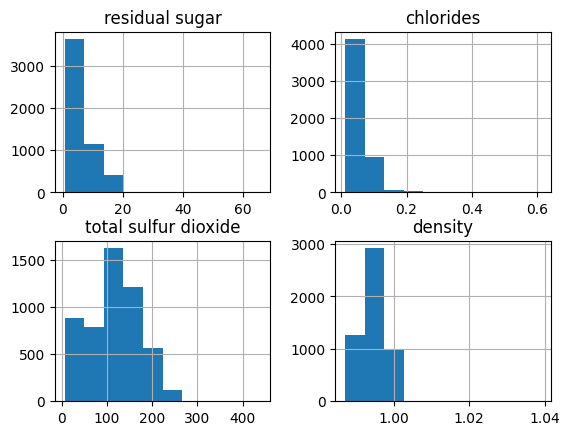

In [258]:
# Crear X_train, X_test, y_train, y_test para clasificación con variables numéricas
X_train_reg = train[selected_features_reg].copy()
X_test_reg = test[selected_features_reg].copy()

y_train_reg = train['alcohol']
y_test_reg = test['alcohol']

X_train_reg.hist()

In [259]:
# Transformación logarítmica de todas las variables de X_train y X_test
X_train_reg = X_train_reg.apply(np.log1p)
X_test_reg = X_test_reg.apply(np.log1p)

# Escalado de las variables con StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_reg = pd.DataFrame(scaler.fit_transform(X_train_reg), columns=X_train_reg.columns, index=X_train_reg.index)
X_test_reg = pd.DataFrame(scaler.transform(X_test_reg), columns=X_test_reg.columns, index=X_test_reg.index)

print("Escalado aplicado a las variables de X_train_reg y X_test_reg")

Escalado aplicado a las variables de X_train_reg y X_test_reg


In [260]:
X_train_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
residual sugar,5197.0,2.252490e-16,1.000096,-1.690855,-0.871054,-0.348548,0.855600,3.775846
chlorides,5197.0,3.554765e-17,1.000096,-1.443689,-0.568984,-0.271299,0.316471,14.587758
total sulfur dioxide,5197.0,-4.593850e-16,1.000096,-3.738053,-0.328503,0.290472,0.684511,2.153040
density,5197.0,1.801172e-14,1.000096,-2.529765,-0.781635,0.062474,0.759548,14.542697


In [261]:
# Transformación de la feature cualitativa
data['quality'].unique()

array([6, 7, 3, 5, 4, 8, 9], dtype=int64)

In [262]:
# Transformar la feature 'quality' con OrdinalEncoder y establecer el orden específico
encoder = OrdinalEncoder(categories=[[3, 4, 5, 6, 7, 8, 9]])
X_train_reg_2 = pd.DataFrame(encoder.fit_transform(train[['quality']]), columns=['quality'], index=train.index)
X_test_reg_2 = pd.DataFrame(encoder.transform(test[['quality']]), columns=['quality'], index=test.index)

X_train_reg_2

,quality
1916,2.0
947,3.0
877,3.0
2927,3.0
6063,4.0
...,...
3772,2.0
5191,2.0
5226,4.0
5390,5.0


In [263]:
# crear X_train y X_test con todas las variables
X_train_reg = pd.concat([X_train_reg.copy(), X_train_reg_2], axis=1)
X_test_reg = pd.concat([X_test_reg.copy(), X_test_reg_2], axis=1)

print("X_trai_reg y X_test_reg finales creados correctamente")

X_trai_reg y X_test_reg finales creados correctamente


In [264]:
y_test_reg

3103     9.3
1419    12.3
4761    12.5
4690    12.5
4032    12.2
        ... 
889      9.2
2850     9.9
4917    12.1
5198    11.4
5643     9.4
Name: alcohol, Length: 1300, dtype: float64

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta **mejorar el "recall medio" con las técnicas que creas conveniente**. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [265]:
y_train_clas.value_counts(normalize=True)

quality
6    0.437560
5    0.328266
7    0.167212
4    0.033288
8    0.028093
3    0.004618
9    0.000962
Name: proportion, dtype: float64

In [180]:
# Comparar modelos de clasificación con class_weight="balanced"
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(class_weight="balanced", random_state=42),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Validación cruzada
k_folds = 5
model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_clas, y_train_clas, cv=k_folds, scoring='f1_macro')
    model_scores[name] = np.mean(scores)
    print(f"\U0001F4CA {name}: F1-Score Macro medio = {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Seleccionar el mejor modelo
best_model = max(model_scores, key=model_scores.get)
print(f"\n\U0001F3C6 El mejor modelo es: **{best_model}** con F1-Score Macro de {model_scores[best_model]:.4f}")

📊 Logistic Regression: F1-Score Macro medio = 0.2156 ± 0.0117
📊 KNN: F1-Score Macro medio = 0.2695 ± 0.0202
📊 Random Forest: F1-Score Macro medio = 0.3460 ± 0.0050
📊 Gradient Boosting: F1-Score Macro medio = 0.2794 ± 0.0057
📊 SVM: F1-Score Macro medio = 0.2560 ± 0.0115
📊 CatBoost: F1-Score Macro medio = 0.3605 ± 0.0098

🏆 El mejor modelo es: **CatBoost** con F1-Score Macro de 0.3605


In [266]:
# Aplicar SMOTE para balancear las clases en X_train
target_column = y_train_clas  # Variable objetivo
smote = SMOTE(random_state=42, k_neighbors=3, sampling_strategy='not majority')
X_train_clas_bal, y_train_clas_bal = smote.fit_resample(X_train_clas, target_column)

In [267]:
y_train_clas_bal.value_counts(normalize=True)

quality
5    0.142857
6    0.142857
7    0.142857
3    0.142857
4    0.142857
8    0.142857
9    0.142857
Name: proportion, dtype: float64

In [130]:
# Definir parámetros para GridSearchCV
param_grid = {
    'iterations': [50, 100,200],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 10, 30]
}

# Definir modelo de clasificación CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Aplicar GridSearchCV
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_clas_bal, y_train_clas_bal)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
print(f"\U0001F3C6 Mejor modelo: {grid_search.best_params_}")

KeyboardInterrupt: 

* Se detiene la ejecución después de 9 minutos. Se prueba con la optimización del modelo que ha obtenido mejor scoring durante la CV (RF)

In [268]:
# Definir parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Definir modelo de clasificación Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Aplicar GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_clas_bal, y_train_clas_bal)

# Mejor modelo y parámetros
best_model = grid_search.best_estimator_
print(f"\U0001F3C6 Mejor modelo: {grid_search.best_params_}")

# Resultados
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\U0001F4CA Random Forest Optimizado: F1-Score Macro medio = {mean_score:.4f} ± {std_score:.4f}")

🏆 Mejor modelo: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📊 Random Forest Optimizado: F1-Score Macro medio = -0.4398 ± 0.0028


In [184]:
y_test_clas

3103    5
1419    7
4761    8
4690    6
4032    7
       ..
889     5
2850    4
4917    7
5198    5
5643    5
Name: quality, Length: 1300, dtype: int64

In [186]:
X_test_clas

,alcohol,density,volatile acidity,chlorides,free sulfur dioxide,citric acid,total sulfur dioxide,residual sugar,fixed acidity,sulphates,class_red,class_white
3103,-1.022479,-0.452504,-0.069834,-0.205494,0.603446,-0.289263,0.830695,-1.096875,0.230734,-0.032403,0,1
1419,1.487767,-1.463689,0.062324,-0.702119,0.205301,-0.505652,0.043129,-0.242603,-0.458083,-0.933655,0,1
4761,1.634340,-1.167492,-0.069834,-0.835769,0.439229,0.263694,0.071287,0.195769,-0.641625,0.529723,0,1
4690,1.634340,-1.433731,-0.690442,-0.969939,0.786503,0.060273,0.600571,-0.979618,-0.279309,0.110855,0,1
4032,1.413652,-1.799984,0.062324,-0.568984,1.231666,-0.360820,0.511364,-0.819648,-0.368116,-0.398961,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889,-1.118286,1.091231,-0.306002,0.251656,0.349937,0.060273,1.042859,1.645196,0.392680,-0.549087,0,1
2850,-0.466469,1.210596,0.876056,2.874151,0.523558,0.847887,-0.886684,-0.979618,3.021316,2.179860,1,0
4917,1.338973,-0.043811,0.062324,-0.107022,-2.237064,1.095898,-3.230899,-0.721949,2.210684,1.129456,1,0
5198,0.799688,-0.153436,0.816068,0.574520,-1.800499,-1.031634,-2.971658,-0.979618,-0.830197,0.110855,1,0


In [187]:
# Evaluación en conjunto de prueba
y_pred = best_model.predict(X_test_clas)
from sklearn.metrics import classification_report
print("\n\U0001F4C8 Reporte de clasificación en test:")
print(classification_report(y_test_clas, y_pred))


📈 Reporte de clasificación en test:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.34      0.30      0.32        43
           5       0.74      0.74      0.74       432
           6       0.70      0.66      0.68       562
           7       0.55      0.66      0.60       210
           8       0.51      0.53      0.52        47

    accuracy                           0.66      1300
   macro avg       0.47      0.48      0.48      1300
weighted avg       0.67      0.66      0.66      1300



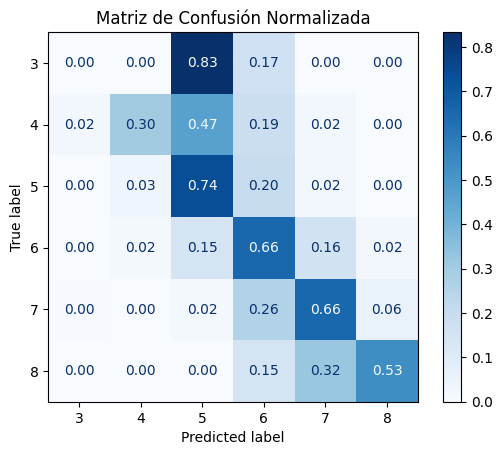

In [189]:
# Análisis de errores
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calcular la matriz de confusión normalizada
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Visualizar la matriz de confusión normalizada
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['3','4','5','6','7','8'])
disp.plot(cmap='Blues', values_format=".2f")  # Muestra porcentajes con 2 decimales
plt.title("Matriz de Confusión Normalizada")
plt.show()

* No se ha obtenido un recall promedio para todas las clase próximo al 50%
* No se ha podido optimizar el modelo CatBoost para el que se obtuvo el mejor scoring en la validación cruzada, por falta de capacidad computacional
* Mejoras: hacer un bineado de las clases de calidad en: baja (0-4), media (5-7), alta (8-10), y entrenar el modelo para estas 3 clases


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para ***predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada***. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [224]:
y_train_reg

1916    11.3
947      9.0
877     10.8
2927     9.4
6063    11.9
        ... 
3772     9.3
5191     9.4
5226    11.0
5390    13.0
860     11.3
Name: alcohol, Length: 5197, dtype: float64

In [225]:
# Comparar modelos de regresión con CV y scoring MAE

# Instanciar los modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Instanciar los modelos sin ajuste de hiperparámetros
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, make_scorer

# Definir validación cruzada con k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)

# Evaluación de modelos con validación cruzada
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_reg, y_train_reg, cv=kf, scoring=scoring)
    cv_results[name] = scores
    print(f"{name}: Mean MAE = {-np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

Linear Regression: Mean MAE = 0.5606, Std = 0.0184
Random Forest: Mean MAE = 0.3602, Std = 0.0078
Support Vector Regressor: Mean MAE = 0.4397, Std = 0.0051
K-Nearest Neighbors: Mean MAE = 0.4494, Std = 0.0062
Gradient Boosting: Mean MAE = 0.4398, Std = 0.0028


In [226]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los hiperparámetros para optimización con GridSearch
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=kf, scoring=scoring, n_jobs=-1, verbose=1)
grid_search.fit(X_train_reg, y_train_reg)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor MAE:", -grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor MAE: 0.35976865142497433


In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
# Evaluación del mejor modelo en el conjunto de test
best_rf = grid_search.best_estimator_
y_pred_test = best_rf.predict(X_test_reg)
test_mae = mean_absolute_error(y_test_reg, y_pred_test)
test_rmse = mean_squared_error(y_test_reg, y_pred_test, squared=False)
test_r2 = r2_score(y_test_reg, y_pred_test)

print("MAE en test set:", test_mae)
print("RMSE en test set:", test_rmse)
print("R² en test set:", test_r2)

MAE en test set: 0.3359597179487185
RMSE en test set: 0.5011855401052804
R² en test set: 0.8217639705766702


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


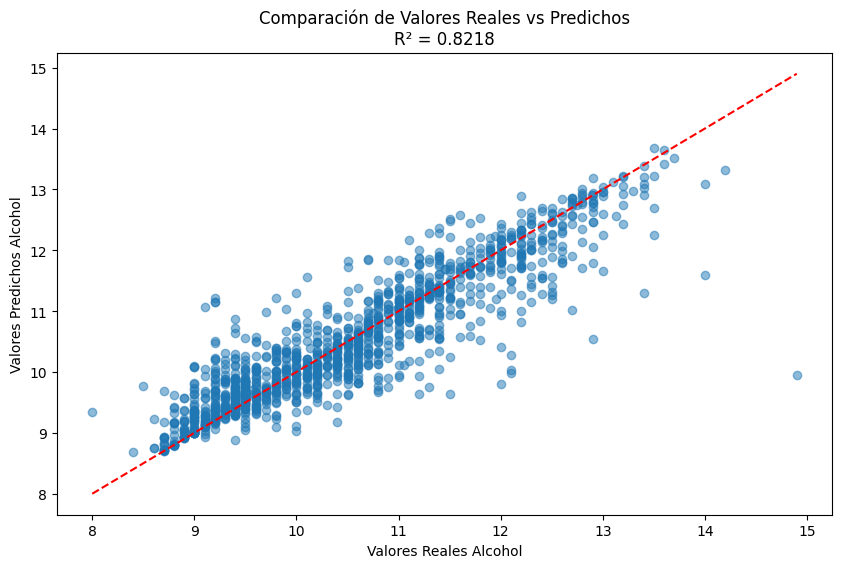

In [231]:
# Comparación de valores reales vs predichos con R² en el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_test, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--r')
plt.xlabel("Valores Reales Alcohol")
plt.ylabel("Valores Predichos Alcohol")
plt.title(f"Comparación de Valores Reales vs Predichos\nR² = {test_r2:.4f}")
plt.show()